In [2]:
# import libraries we will work with today

import pandas as pd
import matplotlib.pyplot as plt 

In [8]:
# read cleaned data

ceo_data = pd.read_excel("../data/cleaned/CEO_data_cleaned.xlsx")

In [9]:
# preview data
# if you see an unamed column, there was a mistake when saving the data 
# add index = False to the to_excel function

ceo_data.head()

,Annual Report Year,Sector,Company Name,Company Ticker,Company Index,Individual Name,Individual Role,Time in Role,Age (Yrs),Number of Qualifications,...,Salary,Bonus,D.C Pension,Other,Total Salary+Bonus,Total Inc. D.C. Pension & Other,Total Equity Linked Compensation,Total Annual Compensation,Liquid Wealth,Total Wealth
0,2009-01-01,General Retailers,TED BAKER PLC,TED,FTSE 250(GBP),Raymond (Ray) Stuart Kelvin,CEO,21.0,53.0,0,...,272,0.0,NaN,11.0,272,283,721.0,993,57467.0,58514.0
1,2009-01-01,General Retailers,NEXT PLC,NXT,FTSE 100 (GBP),Lord (Simon Adam) Wolfson of Aspley Guise,CEO,7.4,41.0,2,...,675,123.0,NaN,33.0,798,831,1581.0,2379,17597.0,19531.0
2,2009-01-01,Engineering & Machinery,MORGAN ADVANCED MATERIALS PLC (Morgan Crucible...,MGAM,FTSE 250(GBP),Mark Robertshaw,CEO,2.4,40.0,1,...,440,264.0,108.0,13.0,704,825,781.0,1485,405.0,2666.0
3,2009-01-01,General Retailers,KINGFISHER PLC,KGF,FTSE 100 (GBP),Sir Ian Michael Cheshire,Group CEO,1.0,49.0,2,...,800,802.0,205.0,35.0,1602,1842,35.0,1637,522.0,4733.0
4,2009-01-01,General Retailers,JD SPORTS FASHION PLC (John David Group prior ...,JD.,FTSE 250(GBP),Barry Colin Bown,CEO,8.5,47.0,0,...,283,285.0,22.0,301.0,568,891,NaN,568,12.0,260.0


In [11]:
pd.set_option('display.max_columns', 500) # you can use this to view all columns

ceo_data.head()

,Annual Report Year,Sector,Company Name,Company Ticker,Company Index,Individual Name,Individual Role,Time in Role,Age (Yrs),Number of Qualifications,Gender,Nationality Mix,Salary,Bonus,D.C Pension,Other,Total Salary+Bonus,Total Inc. D.C. Pension & Other,Total Equity Linked Compensation,Total Annual Compensation,Liquid Wealth,Total Wealth
0,2009-01-01,General Retailers,TED BAKER PLC,TED,FTSE 250(GBP),Raymond (Ray) Stuart Kelvin,CEO,21.0,53.0,0,M,British,272,0.0,NaN,11.0,272,283,721.0,993,57467.0,58514.0
1,2009-01-01,General Retailers,NEXT PLC,NXT,FTSE 100 (GBP),Lord (Simon Adam) Wolfson of Aspley Guise,CEO,7.4,41.0,2,M,British,675,123.0,NaN,33.0,798,831,1581.0,2379,17597.0,19531.0
2,2009-01-01,Engineering & Machinery,MORGAN ADVANCED MATERIALS PLC (Morgan Crucible...,MGAM,FTSE 250(GBP),Mark Robertshaw,CEO,2.4,40.0,1,M,British,440,264.0,108.0,13.0,704,825,781.0,1485,405.0,2666.0
3,2009-01-01,General Retailers,KINGFISHER PLC,KGF,FTSE 100 (GBP),Sir Ian Michael Cheshire,Group CEO,1.0,49.0,2,M,British,800,802.0,205.0,35.0,1602,1842,35.0,1637,522.0,4733.0
4,2009-01-01,General Retailers,JD SPORTS FASHION PLC (John David Group prior ...,JD.,FTSE 250(GBP),Barry Colin Bown,CEO,8.5,47.0,0,M,British,283,285.0,22.0,301.0,568,891,NaN,568,12.0,260.0


In [15]:
# remind yourself... how big is the data set

ceo_data.shape

(1816, 22)

In [16]:
# remind yourself the different fields in the data sets

ceo_data.info()

# Let's start by exploring the variables with data type object and datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Annual Report Year                 1816 non-null   datetime64[ns]
 1   Sector                             1816 non-null   object        
 2   Company Name                       1816 non-null   object        
 3   Company Ticker                     1816 non-null   object        
 4   Company Index                      1816 non-null   object        
 5   Individual Name                    1816 non-null   object        
 6   Individual Role                    1816 non-null   object        
 7   Time in Role                       1816 non-null   float64       
 8   Age (Yrs)                          1811 non-null   float64       
 9   Number of Qualifications           1816 non-null   int64         
 10  Gender                             1

In [77]:
# for reference -- the variables we are going to explore

list(ceo_data.select_dtypes(["object", "datetime64"]).columns)

['Annual Report Year',
 'Sector',
 'Company Name',
 'Company Ticker',
 'Company Index',
 'Individual Name',
 'Individual Role',
 'Gender',
 'Nationality Mix']

In [78]:
# which year is this data from

print(ceo_data["Annual Report Year"].min())
print(ceo_data["Annual Report Year"].max())

# data ranges from 01st Jan 2009 - 01st Dec 2015

2009-01-01 00:00:00
2015-12-01 00:00:00


In [80]:
# what type of roles is this data for

ceo_data["Individual Role"].value_counts()

# safe to say for CEOs...

Individual Role
CEO                                        1248
Group CEO                                   279
Chief Executive                              80
Group Chief Executive                        69
Chairman (Executive)                         37
Chairman/CEO                                 20
President/CEO                                18
Joint CEO                                    14
Division CEO                                 14
Division Chairman/Division CEO                7
CEO/COO                                       5
CEO Designate                                 4
Chairman/Acting CEO                           4
Deputy Chairman/CEO                           3
Executive Vice Chairman/CEO                   3
CEO/MD                                        1
Chairman/Group CEO                            1
Acting CEO/CFO                                1
CEO Designate/Group Commercial Director       1
Acting CEO                                    1
Interim CEO             

In [24]:
# number of companies - counting unique values of Company Name

print("number of companies we have ceo data for:", len(ceo_data["Company Name"].unique()))

number of companies we have ceo data for: 275


In [ ]:
# number of companies - counting unique values of Company Index
# does this differ from Company Name?

print("number of companies we have ceo data for:", len(ceo_data["????"].unique()))

In [28]:
# what type of sectors do we have ceo data for?

ceo_data["Sector"].value_counts()

# which sectors do we have the most data for?

Sector
Speciality & Other Finance                 157
Real Estate                                145
Business Services                          145
Leisure & Hotels                           138
Construction & Building Materials          134
General Retailers                           94
Media & Entertainment                       74
Mining                                      71
Engineering & Machinery                     69
Pharmaceuticals and Biotechnology           56
Transport                                   50
Insurance                                   49
Food Producers & Processors                 49
Aerospace & Defence                         48
Software & Computer Services                48
Oil & Gas                                   48
Life Assurance                              42
Banks                                       36
Investment Companies                        35
Chemicals                                   34
Food & Drug Retailers                       33
Teleco

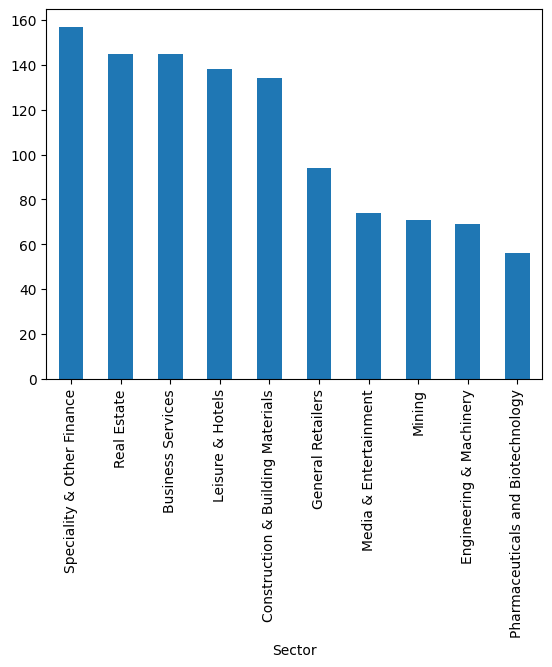

In [36]:
# visualise the data

ceo_data["Sector"].value_counts().nlargest(10).plot(kind = 'bar');

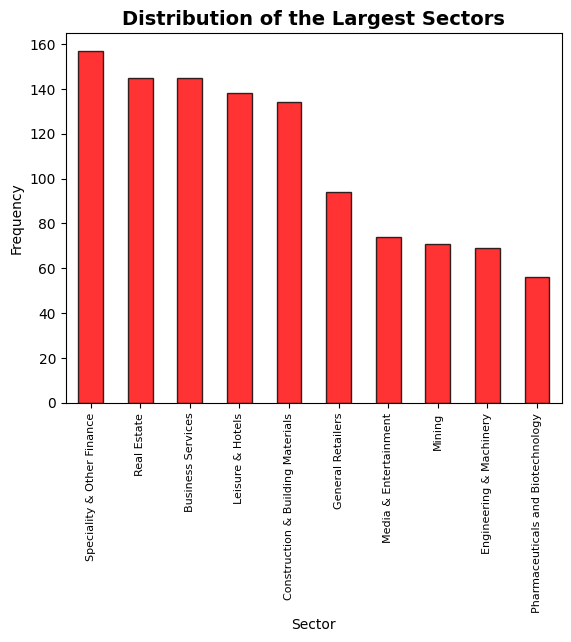

In [50]:
# format the graph

# plt.figure(figsize=(10, 3))
ceo_data["Sector"].value_counts().nlargest(10).plot(kind = 'bar', alpha = 0.8, color='red', edgecolor='black')
plt.title('Distribution of the Largest Sectors', size=14, weight='bold') # add a title
plt.xlabel('Sector', size=10) # add a label to the x-axis
plt.ylabel('Frequency', size=10) # add a label to the y-axis
plt.xticks(fontsize=8, rotation=90);

In [55]:
# Activity: how many different nationalities are there?

print("number of different nationalities:", len(ceo_data["Nationality Mix"].unique()))

number of different nationalities: 29


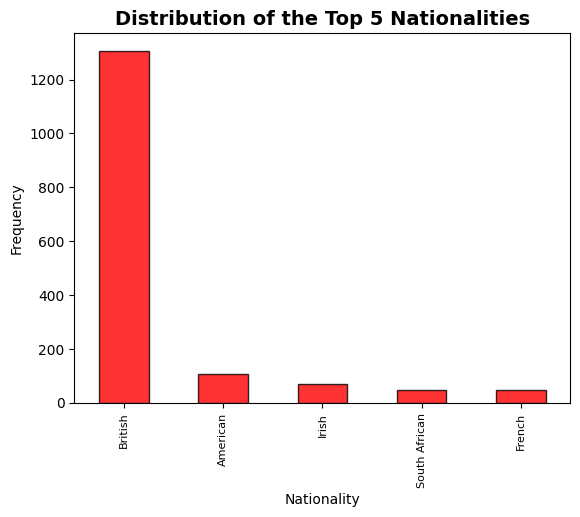

In [54]:
# Activity: Can you visualise the distribution of the top 5 nationalities?


# What are your thoughts on this?

In [57]:
ceo_data["Nationality Mix"].value_counts(normalize = True)

Nationality Mix
British          0.739401
American         0.059356
Irish            0.039570
South African    0.026569
French           0.025438
Australian       0.015263
Dutch            0.011871
Swedish          0.010741
Italian          0.006783
German           0.006218
Israeli          0.005088
New Zealander    0.004522
Indian           0.004522
Norwegian        0.003957
Kazakhstani      0.003957
Greek            0.003957
Jordanian        0.003957
Canadian         0.003957
Peruvian         0.003392
Swiss            0.003392
Pakistani        0.003392
Portuguese       0.002826
Russian          0.002826
Chilean          0.002826
Singaporean      0.002261
Mexican          0.001696
Georgian         0.001696
Syrian           0.000565
Name: proportion, dtype: float64

In [59]:
# before we continue.... how many CEOs do we have data for?

print("number of CEOs we have data for", len(ceo_data["Individual Name"].unique()))

436

In [60]:
# why do we have duplicated data
# identify a ceo appearing multiple times in the data

ceo_data["Individual Name"].value_counts()

Individual Name
Katherine Lucy Garrett-Cox                                8
The Rt. Hon. Lord Nathaniel (Jacob) Charles Rothschild    8
Raymond (Ray) Stuart Kelvin                               7
Ian David Page                                            7
David Richard Hummel                                      7
                                                         ..
Ronald S Lavater                                          1
Dame Clara Hedwig Furse                                   1
Graham Carvell Love                                       1
Iain George Ferguson                                      1
Doctor Christopher (Chris) Phillip Weston                 1
Name: count, Length: 436, dtype: int64

In [61]:
ceo_data[ceo_data["Individual Name"] == "Katherine Lucy Garrett-Cox"]

# each row represents a yearly report for all 436 ceos

,Annual Report Year,Sector,Company Name,Company Ticker,Company Index,Individual Name,Individual Role,Time in Role,Age (Yrs),Number of Qualifications,Gender,Nationality Mix,Salary,Bonus,D.C Pension,Other,Total Salary+Bonus,Total Inc. D.C. Pension & Other,Total Equity Linked Compensation,Total Annual Compensation,Liquid Wealth,Total Wealth
6,2009-01-01,Investment Companies,ALLIANCE TRUST PLC,ATST,FTSE 250(GBP),Katherine Lucy Garrett-Cox,CEO,0.4,41.0,2,F,British,317,0.0,54.0,27.0,317,398,479.0,796,NaN,1996.0
247,2010-01-01,Investment Companies,ALLIANCE TRUST PLC,ATST,FTSE 250(GBP),Katherine Lucy Garrett-Cox,CEO,1.4,42.0,2,F,British,405,203.0,69.0,22.0,608,698,1223.0,1830,743.0,4300.0
499,2011-01-01,Investment Companies,ALLIANCE TRUST PLC,ATST,FTSE 250(GBP),Katherine Lucy Garrett-Cox,CEO,2.4,43.0,2,F,British,405,0.0,69.0,18.0,405,491,1123.0,1528,1047.0,4240.0
740,2011-12-01,Investment Companies,ALLIANCE TRUST PLC,ATST,FTSE 250(GBP),Katherine Lucy Garrett-Cox,CEO,3.3,44.0,2,F,British,390,528.0,97.0,19.0,918,1034,999.0,1917,1179.0,4572.0
1001,2012-12-01,Investment Companies,ALLIANCE TRUST PLC,ATST,FTSE 250(GBP),Katherine Lucy Garrett-Cox,CEO,4.3,45.0,2,F,British,425,520.0,NaN,153.0,945,1098,1197.0,2142,1521.0,4969.0
1270,2013-12-01,Investment Companies,ALLIANCE TRUST PLC,ATST,FTSE 250(GBP),Katherine Lucy Garrett-Cox,CEO,5.3,46.0,2,F,British,425,369.0,106.0,43.0,794,943,1222.0,2016,2474.0,6442.0
1540,2014-12-01,Investment Companies,ALLIANCE TRUST PLC,ATST,FTSE 250(GBP),Katherine Lucy Garrett-Cox,CEO,6.3,47.0,2,F,British,450,576.0,112.0,20.0,1026,1158,1664.0,2690,2902.0,7393.0
1810,2015-12-01,Investment Companies,ALLIANCE TRUST PLC,ATST,FTSE 250(GBP),Katherine Lucy Garrett-Cox,CEO,7.3,48.0,2,F,British,450,411.0,112.0,23.0,861,996,2073.0,2934,2311.0,7584.0


In [72]:
# Look at the Sector Distribution after aggregating the data

ceo_data.groupby(["Sector"])["Individual Name"].nunique()

Sector
Aerospace & Defence                        15
Automobiles & Parts                         4
Banks                                      13
Beverages                                   8
Business Services                          32
Chemicals                                   8
Clothing, Leisure and Personal Products     5
Construction & Building Materials          35
Consumer Services                           1
Containers & Packaging                      6
Diversified Industrials                     1
Electricity                                 4
Electronic & Electrical Equipment           5
Engineering & Machinery                    14
Food & Drug Retailers                      10
Food Producers & Processors                 9
Forestry & Paper                            1
General Retailers                          23
Health                                      6
Insurance                                  12
Investment Companies                        6
Leisure & Hotels           

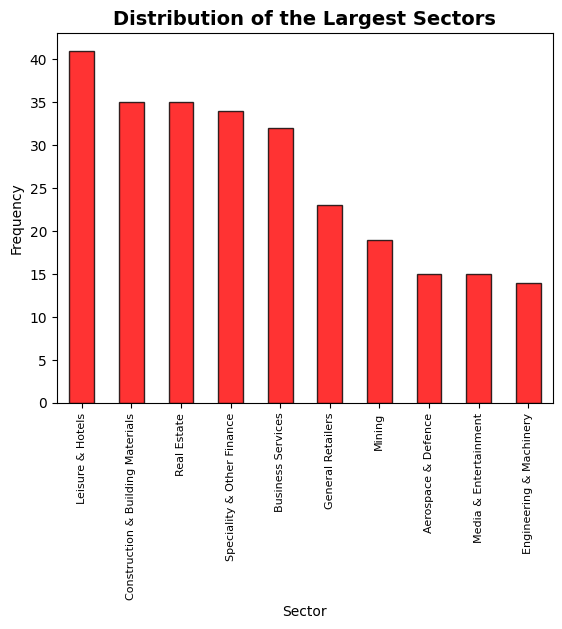

In [71]:
# plt.figure(figsize=(10, 3))
ceo_data.groupby(["Sector"])["Individual Name"].nunique().nlargest(10).plot(kind = 'bar', alpha = 0.8, color='red', edgecolor='black')
plt.title('Distribution of the Largest Sectors', size=14, weight='bold') # add a title
plt.xlabel('Sector', size=10) # add a label to the x-axis
plt.ylabel('Frequency', size=10) # add a label to the y-axis
plt.xticks(fontsize=8, rotation=90);

# queston: Do you see any differences between the two visual representations of Sector?
# question: which graph gives a better representation of Sector?

In [ ]:
# Activity: Can you visualise the Nationality Mix counting each CEO once?
# Do you see any differences?

In [81]:
# what is the distribution of gender?

ceo_data.groupby(["Gender"])["Individual Name"].nunique()

Gender
F     20
M    416
Name: Individual Name, dtype: int64

In [82]:
# view the distribution as a percentage

ceo_data.groupby(["Gender"])["Individual Name"].nunique()/len(ceo_data['Individual Name'].unique())

# grr.....

Gender
F    0.045872
M    0.954128
Name: Individual Name, dtype: float64

In [ ]:
# anything else?

Summarise our explorations:
- We have data on XXX CEOS from XX companies ranging from XX to XX
- The CEOs are predominantly from the XX, XX and XXX sectors
- XX% of CEOs are of XX gender and XX% of CEOs are XXX ..
- Conclusions ???